# Decision tree data weather 
Decision tree data weather (pohon keputusan data cuaca) merujuk pada penggunaan algoritma pohon keputusan dalam konteks dataset cuaca.

Pohon keputusan adalah metode klasifikasi atau regresi yang menggunakan struktur berbentuk pohon untuk membuat keputusan berdasarkan fitur-fitur (variabel) yang ada dalam dataset. Setiap simpul dalam pohon mewakili keputusan berdasarkan suatu fitur, dan cabang-cabang yang keluar dari simpul tersebut mewakili kemungkinan nilai atau klasifikasi yang berbeda dari fitur tersebut.

Dalam konteks data cuaca, pohon keputusan dapat digunakan untuk membuat prediksi atau keputusan berdasarkan variabel-variabel cuaca yang diberikan. Contohnya, pohon keputusan dapat digunakan untuk memprediksi apakah akan hujan atau tidak berdasarkan variabel seperti suhu, kelembaban udara, kecepatan angin, atau kondisi awan.

Proses pembentukan pohon keputusan melibatkan pemilihan fitur terbaik yang memisahkan dataset dengan baik, serta pemilihan aturan pemisahan yang menghasilkan cabang-cabang yang optimal dalam pohon. Pohon keputusan dapat digunakan untuk melakukan klasifikasi, di mana setiap simpul daun mewakili kelas atau label tertentu, atau regresi, di mana setiap simpul daun mewakili nilai numerik.

Pohon keputusan data cuaca dapat membantu dalam pemahaman dan analisis pola-pola cuaca serta membuat prediksi berdasarkan variabel cuaca yang ada.

In [3]:
## import dependencies
from sklearn import tree #For our Decision Tree
import pandas as pd # For our DataFrame
import pydotplus # To create our Decision Tree Graph
from IPython.display import Image  # To Display a image of our graph

membuat sebuah dataset cuaca untuk memprediksi apakah akan ada permainan golf berdasarkan beberapa atribut cuaca

In [4]:
#Create the dataset
#create empty data frame
golf_df = pd.DataFrame()

#add outlook
golf_df['Outlook'] = ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 
                     'overcast', 'sunny', 'sunny', 'rainy', 'sunny', 'overcast',
                     'overcast', 'rainy']

#add temperature
golf_df['Temperature'] = ['hot', 'hot', 'hot', 'mild', 'cool', 'cool', 'cool',
                         'mild', 'cool', 'mild', 'mild', 'mild', 'hot', 'mild']

#add humidity
golf_df['Humidity'] = ['high', 'high', 'high', 'high', 'normal', 'normal', 'normal',
                      'high', 'normal', 'normal', 'normal', 'high', 'normal', 'high']

#add windy
golf_df['Windy'] = ['false', 'true', 'false', 'false', 'false', 'true', 'true',
                   'false', 'false', 'false', 'true', 'true', 'false', 'true']

#finally add play
golf_df['Play'] = ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 
                  'yes', 'yes', 'no']


#Print/show the new data
print(golf_df)

     Outlook Temperature Humidity  Windy Play
0      sunny         hot     high  false   no
1      sunny         hot     high   true   no
2   overcast         hot     high  false  yes
3      rainy        mild     high  false  yes
4      rainy        cool   normal  false  yes
5      rainy        cool   normal   true   no
6   overcast        cool   normal   true  yes
7      sunny        mild     high  false   no
8      sunny        cool   normal  false  yes
9      rainy        mild   normal  false  yes
10     sunny        mild   normal   true  yes
11  overcast        mild     high   true  yes
12  overcast         hot   normal  false  yes
13     rainy        mild     high   true   no


melakukan one-hot encoding pada kolom-kolom kategorikal dalam DataFrame golf_df. One-hot encoding mengubah variabel kategorikal menjadi representasi numerik biner, di mana setiap nilai unik dalam kolom kategorikal akan menjadi kolom baru dalam DataFrame hasil. Hasilnya disimpan dalam DataFrame baru yang disebut one_hot_data, yang akan memiliki kolom-kolom baru yang mewakili setiap nilai unik dalam kolom kategorikal.

In [5]:
one_hot_data = pd.get_dummies(golf_df[ ['Outlook', 'Temperature', 'Humidity', 'Windy'] ])
one_hot_data

,Outlook_overcast,Outlook_rainy,Outlook_sunny,Temperature_cool,Temperature_hot,Temperature_mild,Humidity_high,Humidity_normal,Windy_false,Windy_true
0,0,0,1,0,1,0,1,0,1,0
1,0,0,1,0,1,0,1,0,0,1
2,1,0,0,0,1,0,1,0,1,0
3,0,1,0,0,0,1,1,0,1,0
4,0,1,0,1,0,0,0,1,1,0
5,0,1,0,1,0,0,0,1,0,1
6,1,0,0,1,0,0,0,1,0,1
7,0,0,1,0,0,1,1,0,1,0
8,0,0,1,1,0,0,0,1,1,0
9,0,1,0,0,0,1,0,1,1,0


membuat objek DecisionTreeClassifier dari modul tree dalam scikit-learn. Selanjutnya, model tersebut dilatih menggunakan data hasil one-hot encoding (one_hot_data) sebagai fitur dan kolom target 'Play' dari golf_df. Hasil dari pelatihan model ditampung dalam variabel clf_train.

In [6]:
clf = tree.DecisionTreeClassifier()
clf_train = clf.fit(one_hot_data, golf_df['Play'])

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="x[0] <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]"] ;
1 [label="x[7] <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="x[2] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]"] ;
1 -> 2 ;
3 [label="x[8] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
2 -> 3 ;
4 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
3 -> 4 ;
5 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
3 -> 5 ;
6 [label="gini = 0.0\nsamples = 3\nvalue = [3, 0]"] ;
2 -> 6 ;
7 [label="x[9] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]"] ;
1 -> 7 ;
8 [label="gini = 0.0\nsamples = 3\nvalue = [0, 3]"] ;
7 -> 8 ;
9 [label="x[5] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
7 -> 9 ;
10 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
9 -> 10 ;
11 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
9 -> 11 ;
12 [label="gini = 0.0\nsam

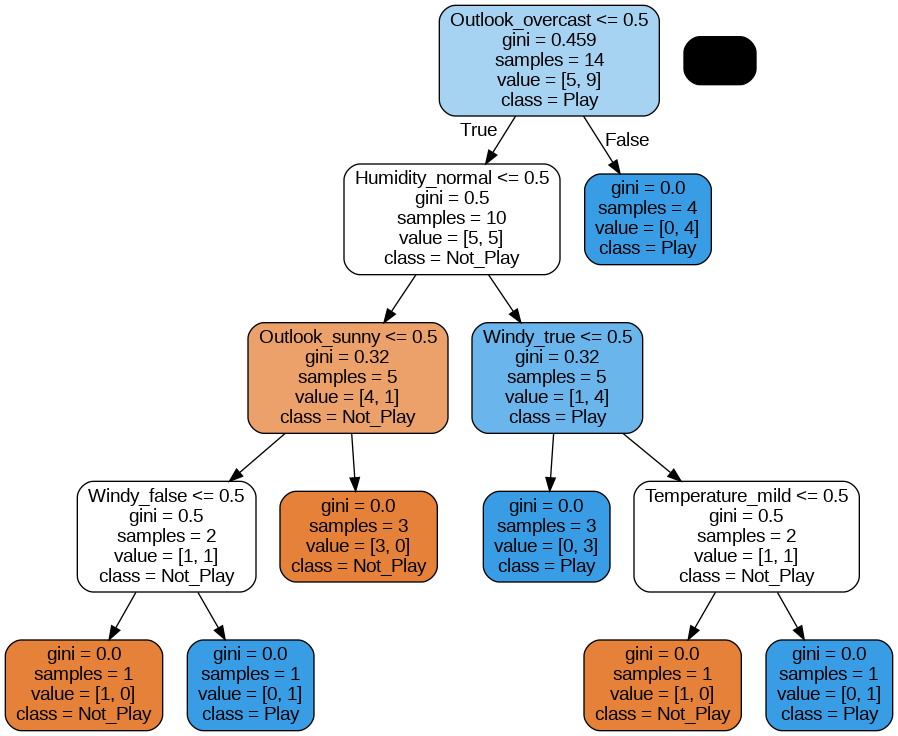

In [ ]:
print(tree.export_graphviz(clf_train, None))
dot_data = tree.export_graphviz(clf_train, out_file=None, feature_names=list(one_hot_data.columns.values), 
                                class_names=['Not_Play', 'Play'], rounded=True, filled=True) 
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())